## 1. Setup RAG & Indexing Documents

In [ ]:
# Import libraries
import sys
import os

root_path = os.path.abspath(".")
sys.path.append(root_path)

from src.rag_pipeline import get_rag_pipeline
from src import config

print("✓ Setup complete!")

# Initialize RAG pipeline
rag = get_rag_pipeline()
print("✓ RAG Pipeline ready!")

# Index Documents
rag.index_documents()
print("✓ Documents indexed!")

✓ Setup complete!
Initializing embeddings model...
Initializing Gemini LLM...
Loading existing vector store...


Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


✓ RAG Pipeline ready!
Đang load 8 file PDF...
✓ Loaded: vision_transformer.pdf (22 pages)
✓ Loaded: resnet_paper.pdf (12 pages)
✓ Loaded: attention_is_all_you_need.pdf (15 pages)
✓ Loaded: llama_paper.pdf (27 pages)
✓ Loaded: gpt3_paper.pdf (75 pages)
✓ Loaded: stable_diffusion.pdf (45 pages)
✓ Loaded: bert_paper.pdf (16 pages)


Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


✓ Loaded: clip_paper.pdf (48 pages)
Created 1173 chunks from 260 documents
Creating vector store...
Vector store created and persisted to ./chroma_db
QA chain setup completed!
✓ Indexing completed successfully!
✓ Documents indexed!


## 2. Visualizing PDF Documents

📚 Found 8 PDF files:



,Filename,Size (MB)
0,vision_transformer.pdf,3.57
1,resnet_paper.pdf,0.78
2,attention_is_all_you_need.pdf,2.11
3,llama_paper.pdf,0.69
4,gpt3_paper.pdf,6.45
5,stable_diffusion.pdf,38.95
6,bert_paper.pdf,0.74
7,clip_paper.pdf,6.50


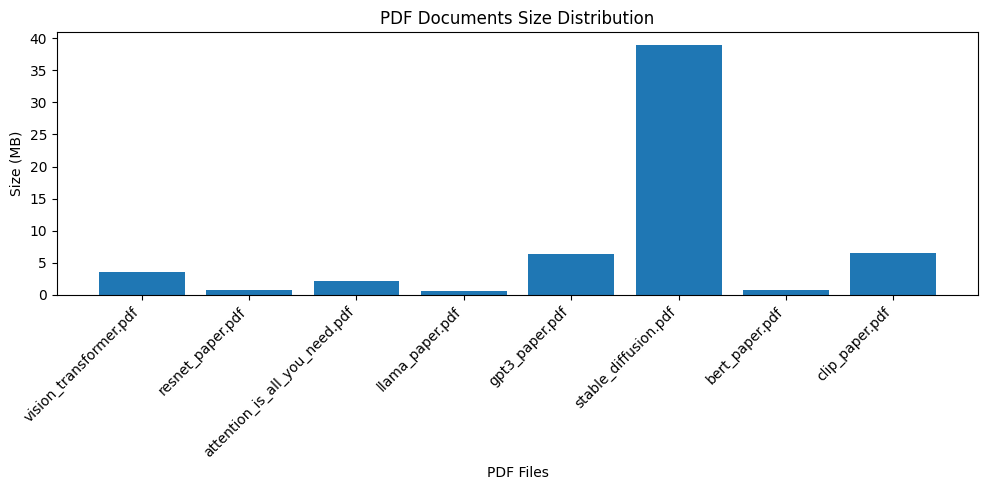

In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

# Analyze PDFs in directory
PDF_DIR = "data/pdfs"
pdf_dir = Path(PDF_DIR)

if pdf_dir.exists():
    pdf_files = list(pdf_dir.glob("*.pdf"))
    
    print(f"📚 Found {len(pdf_files)} PDF files:\n")
    
    # Create dataframe
    pdf_data = []
    for pdf in pdf_files:
        size_mb = pdf.stat().st_size / (1024 * 1024)
        pdf_data.append({
            'Filename': pdf.name,
            'Size (MB)': round(size_mb, 2)
        })
    
    df_pdfs = pd.DataFrame(pdf_data)
    display(df_pdfs)
    
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.bar(df_pdfs['Filename'], df_pdfs['Size (MB)'])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('PDF Files')
    plt.ylabel('Size (MB)')
    plt.title('PDF Documents Size Distribution')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ PDF directory not found!")

### 3. Example RAG Questions

In [7]:
# Example 1: Basic question
question = "What is the Transformer architecture?"

print(f"Question: {question}\n")
result = rag.query(question)
print("Answer:")
print(result['answer'])

/home/hanguyen/mystudy/ai/sudo-code-nlp/08_rag_fastapi/.venv/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


Question: What is the Transformer architecture?

Answer:
Dựa trên thông tin từ tài liệu được cung cấp, không có định nghĩa hoặc giải thích chi tiết về "Transformer architecture".

Tài liệu chỉ đề cập đến "transformer architecture (Vaswani et al., 2017)" trong ngữ cảnh rằng các tác giả của bài báo đã thực hiện các sửa đổi đối với kiến trúc này:
"In the rest of this paper, we present an overview of the modiﬁcations we made to the transformer architecture (Vaswani et al., 2017), as well as our training method."

Do đó, tôi không thể cung cấp thông tin về "Transformer architecture" là gì dựa trên ngữ cảnh này.


In [8]:
# Example 2: Technical question
question = "Explain the self-attention mechanism"

print(f"Question: {question}\n")
result = rag.query(question)
print("Answer:")
print(result['answer'])

Question: Explain the self-attention mechanism

Answer:
Dựa trên thông tin được cung cấp trong tài liệu, cơ chế tự chú ý (self-attention) không được giải thích chi tiết về cách hoạt động nội bộ của nó (ví dụ: cách tính toán query, key, value hay trọng số).

Tuy nhiên, tài liệu có đề cập đến một số khía cạnh và đặc điểm của self-attention:

*   **Mục đích:** Self-attention được ViT (Vision Transformer) sử dụng để tích hợp thông tin trên toàn bộ hình ảnh.
    *   Trích dẫn: "To understand how ViT uses self-attention to integrate information across the image, we analyzed the average distance spanned by attention weights at different layers (Figure 11)."
*   **Độ dài chuỗi (sequence length):** Trong trường hợp "axial", độ dài chuỗi mà self-attention hoạt động là nhỏ hơn.
    *   Trích dẫn: "although the sequence length that self-attention operates on is smaller in axial case, there is a extra MLP per Axial-ViT block."
*   **Khoảng cách chú ý (Attention Distance):** Đây là một khái niệm đượ

### 4. API Usage
To run this part, execute the command: `python -m src.main`

In [11]:
import requests
import json
import time
from pathlib import Path

# API Base URL
BASE_URL = "http://localhost:8000"

print("✓ Setup complete!")
print(f"API URL: {BASE_URL}")

✓ Setup complete!
API URL: http://localhost:8000


In [12]:
# GET /api/status
response = requests.get(f"{BASE_URL}/api/status")
data = response.json()

print("📊 System Status:")
print(json.dumps(data, indent=2))

if data['documents_indexed']:
    print("\n✓ System is ready for queries!")
else:
    print("\n⚠️ Need to index documents first!")

📊 System Status:
{
  "status": "ready",
  "message": "H\u1ec7 th\u1ed1ng \u0111\u00e3 s\u1eb5n s\u00e0ng",
  "documents_indexed": true,
  "vector_store_exists": true
}

✓ System is ready for queries!


In [13]:
# GET /api/documents
response = requests.get(f"{BASE_URL}/api/documents")
data = response.json()

print("📚 Available Documents:\n")
for doc in data['documents']:
    print(f"  📄 {doc['filename']}")
    print(f"     Size: {doc['size_mb']} MB")
    print()

📚 Available Documents:

  📄 vision_transformer.pdf
     Size: 3.57 MB

  📄 resnet_paper.pdf
     Size: 0.78 MB

  📄 attention_is_all_you_need.pdf
     Size: 2.11 MB

  📄 llama_paper.pdf
     Size: 0.69 MB

  📄 gpt3_paper.pdf
     Size: 6.45 MB

  📄 stable_diffusion.pdf
     Size: 38.95 MB

  📄 bert_paper.pdf
     Size: 0.74 MB

  📄 clip_paper.pdf
     Size: 6.5 MB



In [15]:
# POST /api/upload

file_path = "data/pdfs/bert_paper.pdf"
with open(file_path, 'rb') as f:
    files = {'file': f}
    response = requests.post(f"{BASE_URL}/api/upload", files=files)
    data = response.json()
    print(json.dumps(data, indent=2))

{
  "status": "success",
  "message": "Upload th\u00e0nh c\u00f4ng: bert_paper.pdf",
  "filename": "bert_paper.pdf"
}


In [14]:
# POST /api/index
print("⏳ Indexing documents... (this may take a few minutes)")
response = requests.post(f"{BASE_URL}/api/index")
data = response.json()
print(json.dumps(data, indent=2))

⏳ Indexing documents... (this may take a few minutes)
{
  "status": "success",
  "message": "\u0110\u00e3 index th\u00e0nh c\u00f4ng 8 file PDF",
  "files": [
    "vision_transformer.pdf",
    "resnet_paper.pdf",
    "attention_is_all_you_need.pdf",
    "llama_paper.pdf",
    "gpt3_paper.pdf",
    "stable_diffusion.pdf",
    "bert_paper.pdf",
    "clip_paper.pdf"
  ]
}


In [16]:
# Helper function
def query(question):
    """Query the RAG API"""
    response = requests.post(
        f"{BASE_URL}/api/query",
        json={"question": question}
    )
    return response.json()

# Test query
question = "What is the Transformer architecture?"

print(f"Question: {question}\n")
print("⏳ Processing...\n")

start = time.time()
result = query(question)
elapsed = time.time() - start

print("="*70)
print("Answer:")
print("="*70)
print(result['answer'])
print("="*70)
print(f"\n⏱️ Response time: {elapsed:.2f}s")

Question: What is the Transformer architecture?

⏳ Processing...

Answer:
Dựa trên thông tin từ tài liệu được cung cấp, tài liệu chỉ đề cập đến "transformer architecture (Vaswani et al., 2017)" như một kiến trúc mà các tác giả đã thực hiện các sửa đổi.

Tuy nhiên, tài liệu **không cung cấp định nghĩa hoặc giải thích chi tiết** về kiến trúc Transformer là gì. Nó chỉ nhắc đến tên và trích dẫn công trình gốc (Vaswani et al., 2017) mà không đi sâu vào mô tả cấu trúc hay nguyên lý hoạt động của nó.

⏱️ Response time: 2.74s


In [17]:
# Query with detailed sources
question = "What is multi-head attention?"

result = query(question)

print("Answer:")
print(result['answer'])

print("\n" + "="*70)
print(f"Sources ({len(result['sources'])} documents):")
print("="*70)

for i, source in enumerate(result['sources'], 1):
    print(f"\n[{i}]")
    print(f"Content: {source['content'][:200]}...")
    
    if 'metadata' in source:
        meta = source['metadata']
        print(f"Page: {meta.get('page', 'N/A')}")
        print(f"Source: {meta.get('source', 'N/A')}")

Answer:
Dựa trên tài liệu được cung cấp, không có thông tin nào về "multi-head attention".

Tài liệu chỉ mô tả khái niệm chung về "Attention" như sau:
"An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum" (3.2 Attention).

Do đó, tôi không thể trả lời câu hỏi "What is multi-head attention?" dựa trên context đã cho.

Sources (3 documents):

[1]
Content: 3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as ...
Page: 2
Source: data/pdfs/attention_is_all_you_need.pdf

[2]
Content: 3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as ...
Page: 2
Source: da

In [19]:
# Process many questions
import pandas as pd

questions_batch = [
    "What is Transformer?",
    "Explain attention",
    "What is encoder?",
    "What is decoder?",
    "How does it work?"
]

batch_results = []

print("🔄 Processing batch...\n")

for i, q in enumerate(questions_batch, 1):
    print(f"[{i}/{len(questions_batch)}] Processing...")
    
    start = time.time()
    result = query(q)
    elapsed = time.time() - start
    
    batch_results.append({
        'Question': q,
        'Answer Length': len(result['answer']),
        'Sources': len(result.get('sources', [])),
        'Time (s)': round(elapsed, 2)
    })

# Create DataFrame
df = pd.DataFrame(batch_results)
print("\n" + "="*70)
print("Batch Results:")
print("="*70)
display(df)

print(f"\nAverage response time: {df['Time (s)'].mean():.2f}s")

🔄 Processing batch...

[1/5] Processing...
[2/5] Processing...
[3/5] Processing...
[4/5] Processing...
[5/5] Processing...

Batch Results:


,Question,Answer Length,Sources,Time (s)
0,What is Transformer?,564,3,10.55
1,Explain attention,817,3,3.07
2,What is encoder?,723,3,2.66
3,What is decoder?,1162,3,4.10
4,How does it work?,1386,3,23.44



Average response time: 8.76s


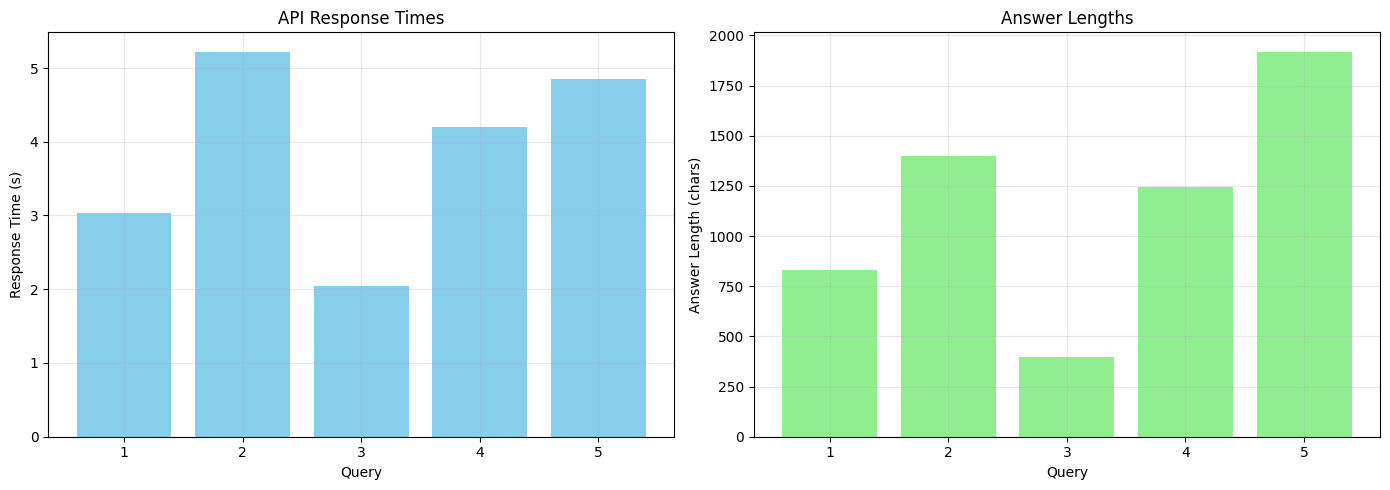


Average response time: 3.87s
Average answer length: 1157 chars


In [20]:
# Monitor API performance
import matplotlib.pyplot as plt

# Collect metrics
test_questions = [
    "What is attention?",
    "Explain transformer",
    "How does encoder work?",
    "What is decoder?",
    "Positional encoding?"
]

times = []
lengths = []

for q in test_questions:
    start = time.time()
    result = query(q)
    elapsed = time.time() - start
    
    times.append(elapsed)
    lengths.append(len(result['answer']))

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(range(1, len(times)+1), times, color='skyblue')
ax1.set_xlabel('Query')
ax1.set_ylabel('Response Time (s)')
ax1.set_title('API Response Times')
ax1.grid(True, alpha=0.3)

ax2.bar(range(1, len(lengths)+1), lengths, color='lightgreen')
ax2.set_xlabel('Query')
ax2.set_ylabel('Answer Length (chars)')
ax2.set_title('Answer Lengths')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAverage response time: {sum(times)/len(times):.2f}s")
print(f"Average answer length: {sum(lengths)/len(lengths):.0f} chars")